In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("data/Breast_Cancer.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
dataset = dataset.drop(['Unnamed: 32','id'],axis = 1)

In [5]:
dataset["diagnosis"].replace(to_replace = dict(M = 1, B = 0), inplace=True)

In [6]:
dataset.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


<AxesSubplot: xlabel='diagnosis'>

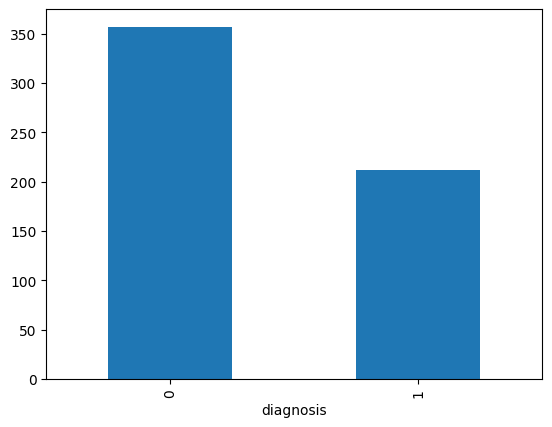

In [7]:
dataset.groupby('diagnosis')['diagnosis'].count().plot(kind='bar')

In [8]:
training_data = dataset.sample(frac=0.8, random_state=25)
testing_data = dataset.drop(training_data.index)

x_train = training_data.iloc[:, 1:]
x_test = testing_data.iloc[:, 1:]

y_train = training_data["diagnosis"]
y_test = testing_data["diagnosis"]

x_train, y_train = x_train.to_numpy(), y_train.to_numpy()
x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

In [9]:
class Perceptron:
    
    def __init__(self, learning_rate=0.001, iterations=1000):
        self.learning_rate = learning_rate 
        self.iterations = iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, Y):
        n_samples, n_features = X.shape
        
        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        Y = np.where(Y > 0, 1, 0)
        
        for _ in range(self.iterations):
            for idx, x_i in enumerate(X):
                
                # approximate y with linear combination of weights and x, plus bias
                linear_model = np.dot(x_i, self.weights) + self.bias

                # apply activation function
                y_predicted = self.activation_function(linear_model)

                # update parameters
                self.weights += x_i * ((Y[idx] - y_predicted) * self.learning_rate)
                self.bias += self.learning_rate * (Y[idx] - y_predicted)

                
    def predict(self, X):
        # approximate y with linear combination of weights and x, plus bias
        linear_model = np.dot(X, self.weights) + self.bias

        # apply activation function
        y_predicted = self.activation_function(linear_model)
        
        return y_predicted
    
    def activation_function(self, x):
        return np.where(x > 0, 1, 0)

In [10]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [11]:
perceptron = Perceptron(learning_rate=0.001, iterations=20000)
perceptron.fit(x_train, y_train)
predicted = perceptron.predict(x_test)

acc = accuracy(y_test, predicted)
print(f"Perceptron classification accuracy: {acc * 100}%")

Perceptron classification accuracy: 96.49122807017544%


In [12]:
data = pd.read_csv("Data/Iris.csv")
data["Species"].replace(to_replace = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}, inplace=True)

data = data.loc[data["Species"] != 2]

x_train_2 =  data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
x_test_2 = data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]] 

y_train_2 =  data["Species"]
y_test_2 = data["Species"]

x_train_2, y_train_2 = x_train_2.to_numpy(), y_train_2.to_numpy()
x_test_2, y_test_2 = x_test_2.to_numpy(), y_test_2.to_numpy()

perc = Perceptron()
perc.fit(x_train_2, y_train_2)
predicted = perc.predict(x_test_2)

acc = accuracy(y_test_2, predicted)
print(f"Perceptron classification accuracy: {acc * 100}%")

Perceptron classification accuracy: 100.0%


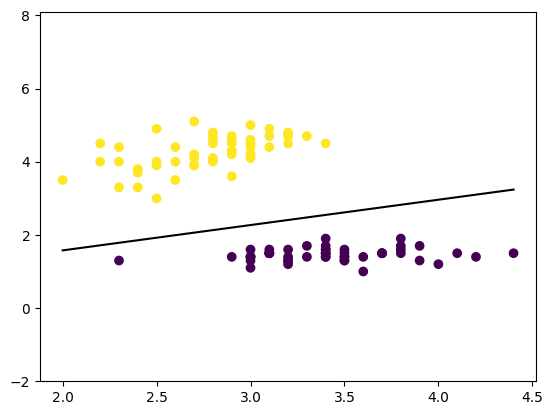

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(x_test_2[:, 1], x_test_2[:, 2], marker="o", c=y_test_2)

x0_1 = np.amin(x_test_2[:, 1])
x0_2 = np.amax(x_test_2[:, 1])

x1_1 = (-perc.weights[1] * x0_1 - perc.bias) / perc.weights[2]
x1_2 = (-perc.weights[1] * x0_2 - perc.bias) / perc.weights[2]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(x_test_2[:, 2])
ymax = np.amax(x_test_2[:, 2])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()